# Day 8 作業

## [作業目標]
* 熟悉濾波器的操作

    1. 比較四種低通濾波器的去噪能力及運算時間 (Average, Gaussian, NL, Median)
    2. 比較兩種邊緣偵測演算法的效果及運算時間 (Sobel, Canny)

## [作業重點]
* 熟悉 OpenCV 的 filter2D 函數
* 觀察圖片的變化

(-0.5, 511.5, 511.5, -0.5)

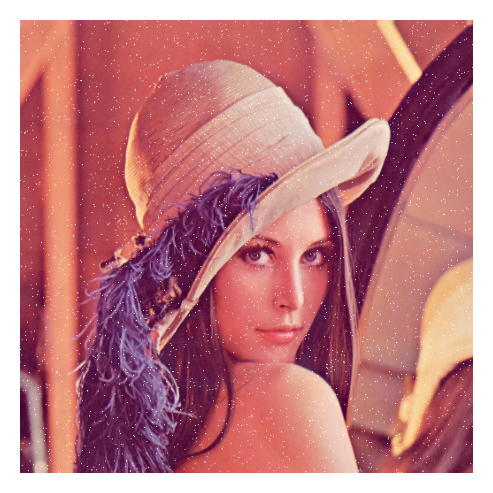

In [1]:
import cv2
import numpy as np
import time
import random
import matplotlib.pyplot as plt

""" Your Code Here: 讀取 lena_noise.png 並使用 matplotlib 顯示 """
img = cv2.imread('lena.png')
row, col, _ = img.shape
img_noise = img.copy()

for i in range(row):
    for j in range(col):
        seed = random.random()
        if seed < 0.01:
            # 加入白噪聲
            img_noise[i, j] = np.array([255, 255, 255], dtype = 'uint8')

plt.figure(figsize = (3, 3), dpi = 200)
plt.imshow(img_noise[:, :, [2, 1, 0]])
plt.axis('off')

# 1. 比較四種低通濾波器的去噪能力及運算時間 (Average, Gaussian, NL, Median)
* 因為 Average, Gaussian 都是使用 filter2D 去掃描圖片，故速度差不多
* NL 具較高的時間複雜度，需要較久的時間
* Median 具有最好的去白噪點效果，因為該演算法只會取範圍內的中位數，可以徹底去除極端值

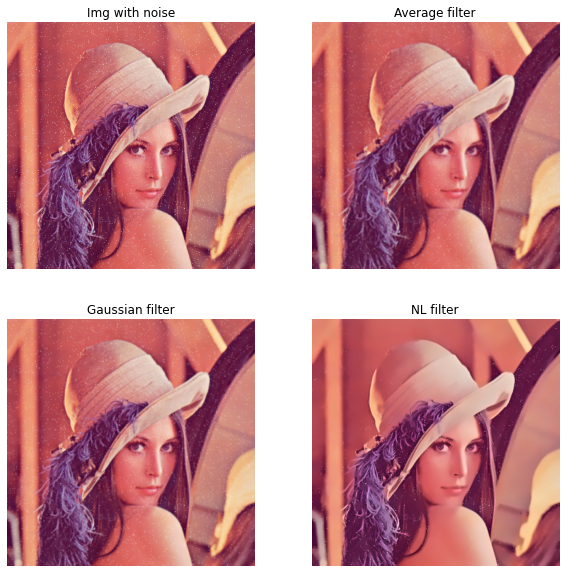

In [2]:
""" Your Code Here: 分別比較四個演算法的運算時間及畫出處理後的圖片 """
# average blur
### make average filter
average_filter = np.ones((3, 3)) / 9
### filtering
img_average = cv2.filter2D(img_noise, -1, average_filter)

# gaussian blur
### make gaussian filter
gaussian_filter = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16
img_gaussian = cv2.filter2D(img_noise, -1, gaussian_filter)

# NL
img_NL = cv2.fastNlMeansDenoisingColored(img_noise, None, 10, 10, 7, 21)

# plot
plt.figure(figsize = (10, 10))
show_img = [img_noise, img_average, img_gaussian, img_NL]
show_name = ['Img with noise', 'Average filter', 'Gaussian filter', 'NL filter']
for i in range(len(show_img)):
    plt.subplot(2, 2, i + 1, title = show_name[i])
    plt.imshow(show_img[i][:, :, [2, 1, 0]])
    plt.axis('off')

# 2. 比較兩種邊緣偵測演算法的效果及運算時間 (Sobel, Canny)

In [3]:
def sobel(gray):
    """ Your Code Here: 實作 Sobel 演算法 """
    # Get x edge
    sobel_x = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])

    edge = cv2.filter2D(gray, -1, sobel_x)
    return edge

def canny(gray):
    """ Your Code Here: 實作 Canny 演算法 """
    # Get y edge
    sobel_y = np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]])

    edge = cv2.filter2D(gray, -1, sobel_y)
    return edge

def gaussian(gray):
    """ Your Code Here: 實作 Canny 演算法 """
    # Get y edge
    gaussian_filter = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]]) / 16

    edge = cv2.filter2D(gray, -1, gaussian_filter)
    return edge

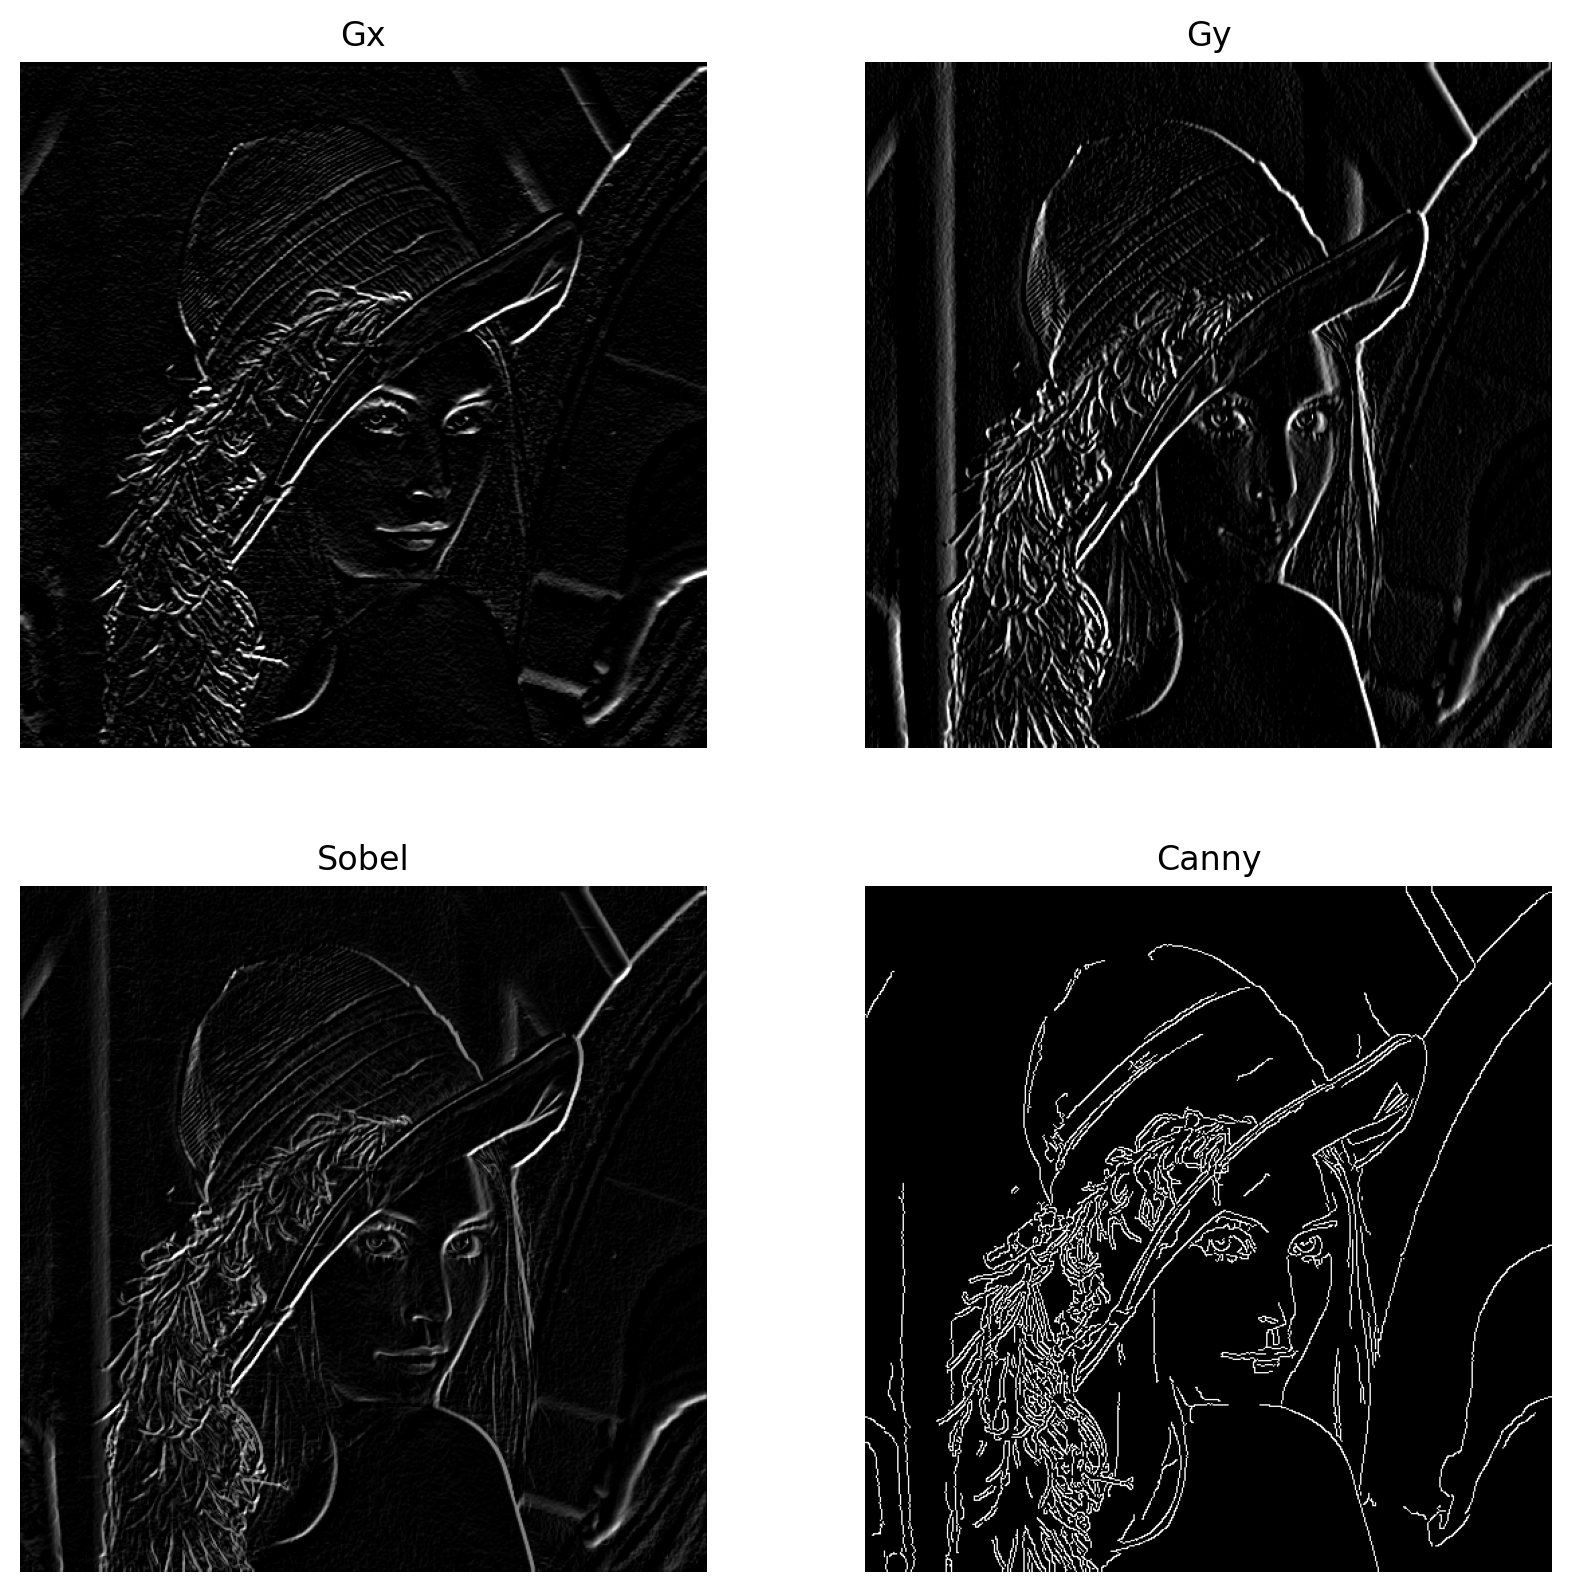

In [4]:
""" Your Code Here: 讀取 ./data/paper.jpg 進行實作 """
img = cv2.imread('lena.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Gx = cv2.convertScaleAbs(sobel(gray))
Gy = cv2.convertScaleAbs(canny(gray))
edge = cv2.addWeighted(Gx, 0.5, Gy, 0.5, 0)
edge_canny = cv2.Canny(gaussian(gray), 50, 150)

""" Your Code Here: 分別比較四個演算法的運算時間及畫出處理後的圖片 """
plt.figure(figsize = (10, 10), dpi = 200)
show_img = [Gx, Gy, edge, edge_canny]
show_name = ['Gx', 'Gy', 'Sobel', 'Canny']
for i in range(len(show_img)):
    plt.subplot(2, 2, i + 1, title = show_name[i])
    plt.imshow(show_img[i], cmap = 'gray')
    plt.axis('off')